EDA

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
data.head()

,Year,Company ID,Company code,Company Name,Sector,Industry,Location,Working Capital,Retained Earnings,EBIT,...,Cash Flow,Debt to Equity,A,B,C,D,E,Loan Taken,Z_Score,Bankruptcy?
0,2022,101067,OR,Osisko Gold Royalties Ltd,Public,Real Estate,Michigan,47452.99,954219.82,653729.39,...,267250.89,0.72,0.16,3.20,2.19,3.31,1.07,326920.78,15.00,0
1,2022,101005,MSB,Mesabi Trust,Private,Health Care,Pennsylvania,968922.87,564376.90,808519.43,...,23716.17,0.83,2.44,1.42,2.03,2.51,1.91,827013.10,15.14,0
2,2022,101082,CBT,Cabot Corporation,Private,Consumer Defense,Oregon,293719.91,923685.02,880144.16,...,819619.67,0.22,0.89,2.79,2.66,2.01,0.51,360114.89,15.50,0
3,2021,101042,CGAU,Centerra Gold Inc.,General,Basic Materials,Illinois,442574.42,929202.49,281901.47,...,277140.17,0.03,1.82,3.82,1.16,3.92,1.81,975182.56,15.62,0
4,2021,101029,CENX,Century Aluminum Company,Private,Consumer Defense,Idaho,264908.68,354449.40,661517.40,...,270518.04,0.45,1.09,1.46,2.72,0.94,2.94,937802.30,15.98,0


In [11]:

# Check the shape of the DataFrame
print("Data shape:", data.shape)

# Check the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Check for duplicated rows
print("Number of duplicated rows:", data.duplicated().sum())


Data shape: (198, 24)
Year                       int64
Company ID                 int64
Company code              object
Company Name              object
Sector                    object
Industry                  object
Location                  object
Working Capital          float64
Retained Earnings        float64
EBIT                     float64
Market Capitalisation    float64
Sales                    float64
Total Assets             float64
Total Liabilities        float64
Cash Flow                float64
Debt to Equity           float64
A                        float64
B                        float64
C                        float64
D                        float64
E                        float64
Loan Taken               float64
Z_Score                  float64
Bankruptcy                 int64
dtype: object
Year                     0
Company ID               0
Company code             0
Company Name             0
Sector                   0
Industry                 0
Location  

              Year    Company ID  Working Capital  Retained Earnings  \
count   198.000000     198.00000       198.000000         198.000000   
mean   2021.500000  101050.00000    499626.005202      486669.361465   
std       0.501267      28.64982    293996.961913      288088.102895   
min    2021.000000  101001.00000      4801.730000         491.680000   
25%    2021.000000  101025.25000    246349.522500      258738.937500   
50%    2021.500000  101050.00000    510334.310000      496354.035000   
75%    2022.000000  101074.75000    744676.777500      734777.965000   
max    2022.000000  101099.00000    996842.880000      996756.020000   

                EBIT  Market Capitalisation          Sales   Total Assets  \
count     198.000000             198.000000     198.000000     198.000000   
mean   515440.918788          530523.987323  471170.826313  525535.375909   
std    292552.313702          278957.469694  290566.642746  295251.023292   
min     18914.670000            5274.120000

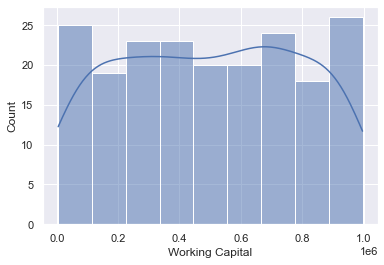

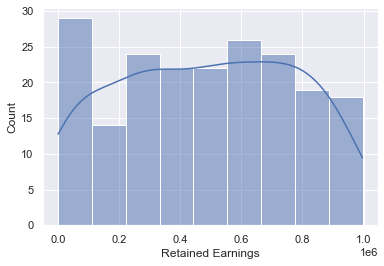

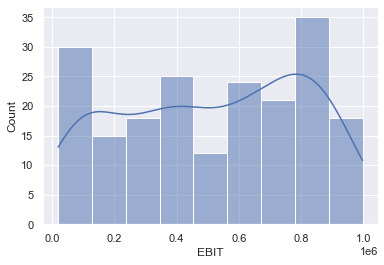

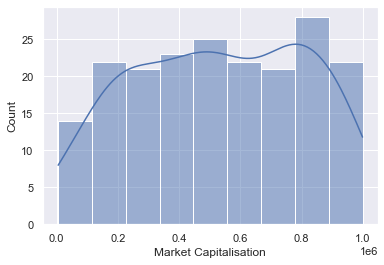

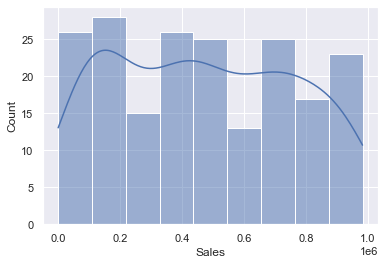

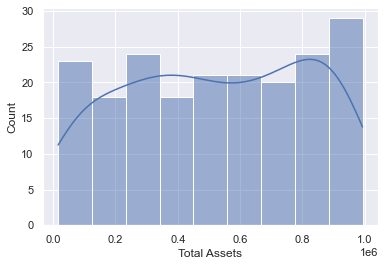

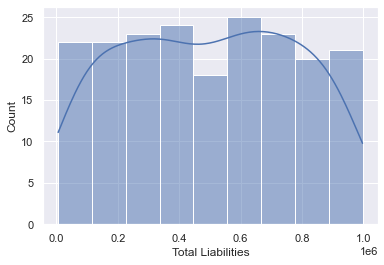

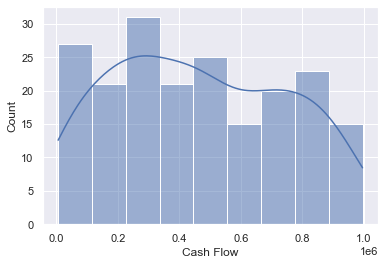

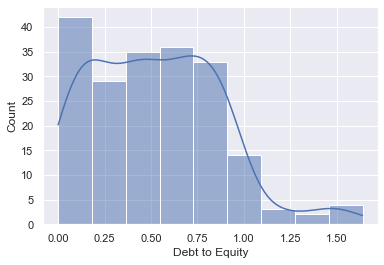

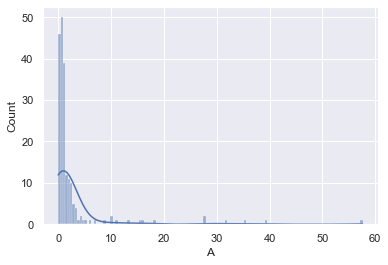

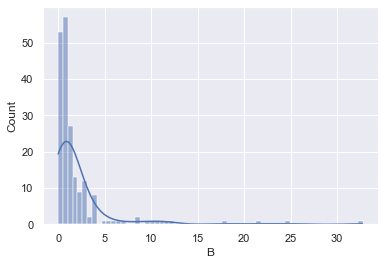

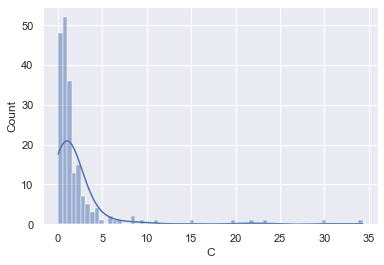

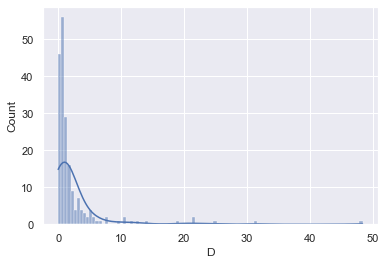

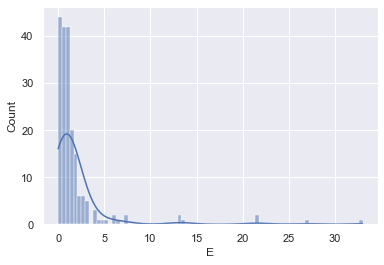

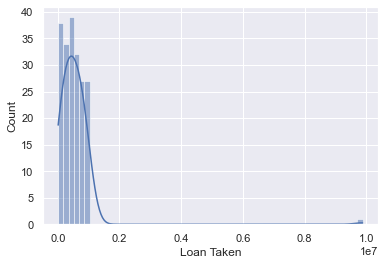

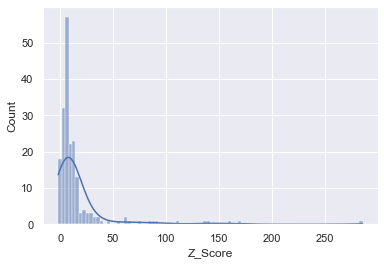

In [20]:

# Describe the numerical variables
print(data.describe())

# Plot histograms for numerical variables
sns.set(style="darkgrid")
numerical_vars = ['Working Capital', 'Retained Earnings', 'EBIT', 'Market Capitalisation', 'Sales', 'Total Assets', 'Total Liabilities', 'Cash Flow', 'Debt to Equity', 'A', 'B', 'C', 'D', 'E', 'Loan Taken', 'Z_Score']
for var in numerical_vars:
    sns.histplot(data=data, x=var, kde=True)
    plt.show()

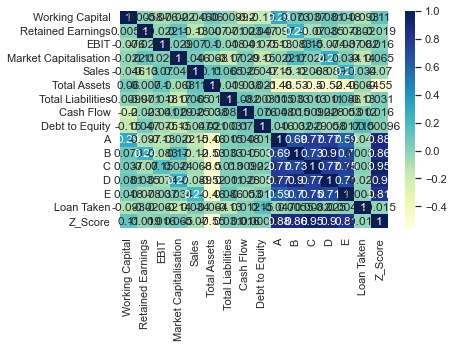

In [21]:

# Plot a correlation heatmap for numerical variables
corr = data[numerical_vars].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

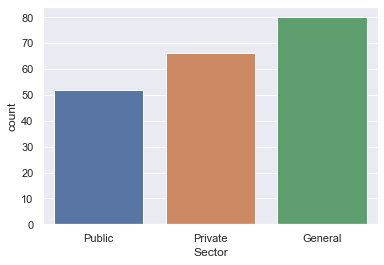

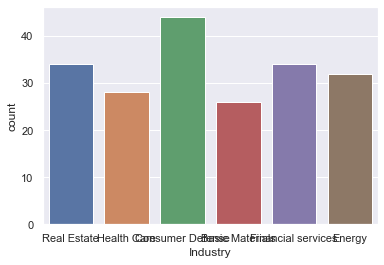

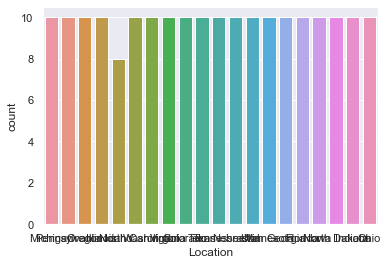

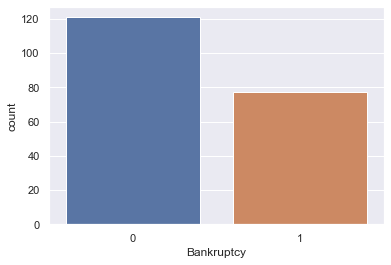

In [22]:

# Plot bar charts for categorical variables
categorical_vars = ['Sector', 'Industry', 'Location', 'Bankruptcy']
for var in categorical_vars:
    sns.countplot(data=data, x=var)
    plt.show()

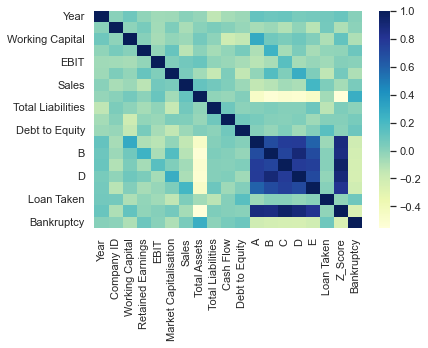

In [23]:
# Create a correlation matrix
corr_matrix = data.corr()

# Plot a correlation heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

This will give us a visual representation of the correlation between each pair of variables in the dataset. The darker colors indicate a stronger positive correlation, while lighter colors indicate a weaker or negative correlation.

The next step is to preprocess the data before training the machine learning model. This involves handling missing values, encoding categorical variables, and splitting the data into training and testing sets. Here's an example code to perform these tasks:

## Logistic Regression

In [38]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('data.csv')

# Select the features and target variable
features = data[['Working Capital', 'Retained Earnings', 'EBIT', 'Market Capitalisation', 'Sales', 'Total Assets', 'Total Liabilities', 'Cash Flow', 'Debt to Equity', 'A', 'B', 'C', 'D', 'E', 'Loan Taken', 'Z_Score']]
target = data['Bankruptcy?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.575
Confusion matrix:
[[17  5]
 [12  6]]


Accuracy: The accuracy of the model is 0.575 or 57.5%, which means that the model correctly classified 57.5% of the companies as bankrupt or non-bankrupt based on their financial attributes.

Confusion Matrix: The confusion matrix shows the actual and predicted classifications of the model. It has 4 values:

True Positive (TP): The model predicted that the company is bankrupt and it actually went bankrupt. In this case, there are 6 true positives.

False Positive (FP): The model predicted that the company is bankrupt, but it did not actually go bankrupt. In this case, there are 5 false positives.

True Negative (TN): The model predicted that the company is not bankrupt, and it did not actually go bankrupt. In this case, there are 17 true negatives.

False Negative (FN): The model predicted that the company is not bankrupt, but it actually went bankrupt. In this case, there are 12 false negatives.

The confusion matrix suggests that the model is better at predicting non-bankrupt companies (17 true negatives) than bankrupt companies (6 true positives). However, it is still misclassifying a significant number of companies as bankrupt or non-bankrupt. This indicates that the model may not be the best fit for the data or that more data may be required to improve the accuracy of the model.

In [40]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('data.csv')

# Select the features and target variable
features = data[['Working Capital', 'Retained Earnings', 'EBIT', 'Market Capitalisation', 'Sales', 'Total Assets', 'Total Liabilities', 'Cash Flow', 'Debt to Equity', 'A', 'B', 'C', 'D', 'E', 'Loan Taken', 'Z_Score']]
target = data['Bankruptcy?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.525
Confusion matrix:
[[16  6]
 [13  5]]


## XGBOOST

In [42]:
# pip install xgboost if not there in your system

In [44]:
# Import required libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('data.csv')

# Select the features and target variable
features = data[['Working Capital', 'Retained Earnings', 'EBIT', 'Market Capitalisation', 'Sales', 'Total Assets', 'Total Liabilities', 'Cash Flow', 'Debt to Equity', 'A', 'B', 'C', 'D', 'E', 'Loan Taken', 'Z_Score']]
target = data['Bankruptcy?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the XGBoost classifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)

Accuracy: 0.625
Confusion matrix:
[[17  5]
 [10  8]]


### Trying to get the significance of the attributes on target variables

In [48]:
# Import required libraries
import xgboost as xgb

# Load the data
data = pd.read_csv('data.csv')

# Select the features and target variable
features = data[['Working Capital', 'Retained Earnings', 'EBIT', 'Market Capitalisation', 'Sales', 'Total Assets', 'Total Liabilities', 'Cash Flow', 'Debt to Equity', 'A', 'B', 'C', 'D', 'E', 'Loan Taken', 'Z_Score']]
target = data['Bankruptcy?']

# Define the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the XGBoost classifier
model.fit(features, target)

# Extract feature importances
importances = model.feature_importances_

# Create a dictionary of feature importances with feature names as keys
importance_dict = {feature: importance for feature, importance in zip(features.columns, importances)}

# Sort the dictionary by value in ascending order
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1])

# Print the feature importances in ascending order with feature names
for feature, importance in sorted_importances:
    print(f'{feature}: {importance}')


B: 0.031595759093761444
EBIT: 0.041083402931690216
Total Liabilities: 0.044836245477199554
Market Capitalisation: 0.045220643281936646
Total Assets: 0.045413024723529816
Debt to Equity: 0.04585304483771324
Working Capital: 0.046544767916202545
Loan Taken: 0.04927707090973854
C: 0.05184413865208626
A: 0.05671512708067894
Cash Flow: 0.06022678688168526
Retained Earnings: 0.06393998116254807
Sales: 0.06469151377677917
E: 0.0715179592370987
D: 0.1284615397453308
Z_Score: 0.1527790129184723
